In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [31]:
df = pd.read_csv('datanormalization2022.csv') 
df


,Average housing prices,Distance away from CBD,Financial institution density,Retail store density,School density,Park density,Technology companies
0,1.000000,0.048387,0.026603,0.523821,0.168335,0.601253,0.006410
1,0.107668,0.277055,0.001663,0.012755,0.001687,0.012526,0.012821
2,0.915630,0.067725,0.258082,0.415031,0.177330,0.281837,0.076923
3,0.524149,0.109955,0.055976,0.070026,0.028562,0.139875,0.365385
4,0.295502,0.158082,0.124792,0.288108,0.057348,0.478079,0.006410
...,...,...,...,...,...,...,...
326,0.117373,0.244797,0.014872,0.040140,0.003261,0.091858,0.076923
327,0.708355,0.112730,0.212913,0.610104,0.138086,0.315240,1.000000
328,0.020331,0.462279,0.000647,0.005752,0.001912,0.010438,0.000000
329,0.625334,0.112470,0.131628,0.282356,0.275385,0.334029,0.506410


In [32]:
df['Average housing prices'].describe() #查看分布

count    331.000000
mean       0.248643
std        0.238867
min        0.000000
25%        0.064041
50%        0.144369
75%        0.378420
max        1.000000
Name: Average housing prices, dtype: float64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Average housing prices         331 non-null    float64
 1   Distance away from CBD         331 non-null    float64
 2   Financial institution density  331 non-null    float64
 3   Retail store density           331 non-null    float64
 4   School density                 331 non-null    float64
 5   Park density                   331 non-null    float64
 6   Technology companies           331 non-null    float64
dtypes: float64(7)
memory usage: 18.2 KB


In [34]:
df.isnull().sum()

Average housing prices           0
Distance away from CBD           0
Financial institution density    0
Retail store density             0
School density                   0
Park density                     0
Technology companies             0
dtype: int64

In [35]:
df=df.dropna()
df

,Average housing prices,Distance away from CBD,Financial institution density,Retail store density,School density,Park density,Technology companies
0,1.000000,0.048387,0.026603,0.523821,0.168335,0.601253,0.006410
1,0.107668,0.277055,0.001663,0.012755,0.001687,0.012526,0.012821
2,0.915630,0.067725,0.258082,0.415031,0.177330,0.281837,0.076923
3,0.524149,0.109955,0.055976,0.070026,0.028562,0.139875,0.365385
4,0.295502,0.158082,0.124792,0.288108,0.057348,0.478079,0.006410
...,...,...,...,...,...,...,...
326,0.117373,0.244797,0.014872,0.040140,0.003261,0.091858,0.076923
327,0.708355,0.112730,0.212913,0.610104,0.138086,0.315240,1.000000
328,0.020331,0.462279,0.000647,0.005752,0.001912,0.010438,0.000000
329,0.625334,0.112470,0.131628,0.282356,0.275385,0.334029,0.506410


In [36]:
y=df["Average housing prices"]
y

0      1.000000
1      0.107668
2      0.915630
3      0.524149
4      0.295502
         ...   
326    0.117373
327    0.708355
328    0.020331
329    0.625334
330    0.564819
Name: Average housing prices, Length: 331, dtype: float64

In [37]:
X= df[df.columns[1:]]
X

,Distance away from CBD,Financial institution density,Retail store density,School density,Park density,Technology companies
0,0.048387,0.026603,0.523821,0.168335,0.601253,0.006410
1,0.277055,0.001663,0.012755,0.001687,0.012526,0.012821
2,0.067725,0.258082,0.415031,0.177330,0.281837,0.076923
3,0.109955,0.055976,0.070026,0.028562,0.139875,0.365385
4,0.158082,0.124792,0.288108,0.057348,0.478079,0.006410
...,...,...,...,...,...,...
326,0.244797,0.014872,0.040140,0.003261,0.091858,0.076923
327,0.112730,0.212913,0.610104,0.138086,0.315240,1.000000
328,0.462279,0.000647,0.005752,0.001912,0.010438,0.000000
329,0.112470,0.131628,0.282356,0.275385,0.334029,0.506410


In [38]:
X.select_dtypes(include=['object']).columns #no object columns

Index([], dtype='object')

vif

Text(0.5, 1.0, 'Correlation Matrix')

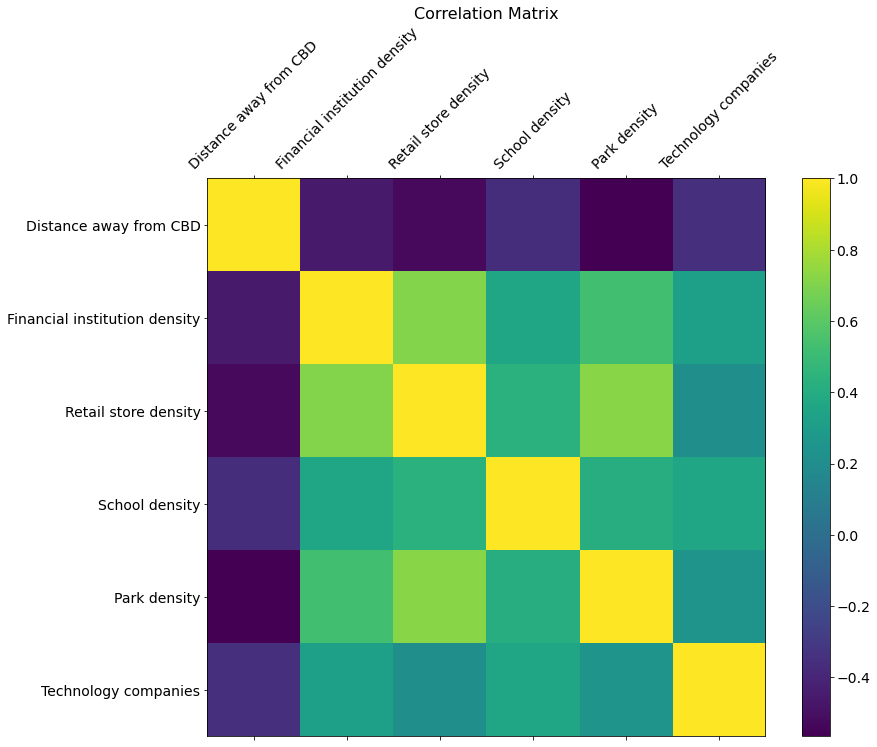

In [39]:
df = X
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(13, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [40]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [41]:
x_VIF = drop_column_using_vif_(X, thresh=5)
print("The columns remaining after VIF selection are:")
print(x_VIF.columns)

Max VIF: 3.1853135338768257
The columns remaining after VIF selection are:
Index(['Distance away from CBD', 'Financial institution density',
       'Retail store density', 'School density', 'Park density',
       'Technology companies'],
      dtype='object')


/Users/lin/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
reg = LinearRegression().fit(x_VIF, y)

In [44]:
print('Constant term: ', reg.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": x_VIF.columns.values, "coef":reg.coef_})
print(df_coef_lr_VIF)

Constant term:  0.24168888022297938
                             var      coef
0         Distance away from CBD -0.388156
1  Financial institution density  0.314347
2           Retail store density  0.162426
3                 School density  0.378073
4                   Park density  0.249440
5           Technology companies  0.231179


In [45]:
reg.score(x_VIF, y)                                            

0.7226338259839071

In [46]:
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=y, exog=sm.add_constant(x_VIF)).fit()
regressor_OLS.summary()

/Users/lin/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Average housing prices   R-squared:                       0.723
Model:                                OLS   Adj. R-squared:                  0.717
Method:                     Least Squares   F-statistic:                     140.7
Date:                    Sun, 18 Sep 2022   Prob (F-statistic):           4.17e-87
Time:                            07:50:08   Log-Likelihood:                 217.01
No. Observations:                     331   AIC:                            -420.0
Df Residuals:                         324   BIC:                            -393.4
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2417      0.019     12.518      0.000       0.204       0.280
Distance away from CBD           -0.3882      0.041     -9.537      0.000      -0.468      -0.308
Financial institution density     0.3143      0.081      3.905      0.000       0.156       0.473
Retail store density              0.1624      0.056      2.917      0.004       0.053       0.272
School density                    0.3781      0.080      4.705      0.000       0.220       0.536
Park density                      0.2494      0.064      3.886      0.000       0.123       0.376
Technology companies              0.2312      0.062      3.740      0.000       0.110       0.353
==============================================================================
Omnibus:                       74.143   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.122
Skew:                           1.065   Prob(JB):                     2.33e-41
Kurtosis:                       6.006   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""